In [1]:
import torch
from torch import nn
from torch.optim import Adam
device = torch.device('cuda:1')

from sklearn.metrics import r2_score, mean_absolute_error
from tools import validation, Trainer

from get_loaders import get_loaders

from LSMLP import LSMLP

In [2]:
train_loader, test_loader = get_loaders(
    window_size=60, test_size=0.2, batch_size=16)

criterion = nn.MSELoss()
eval_metrics = [r2_score, mean_absolute_error]
lr = 1e-4

100%|██████████| 306/306 [00:00<00:00, 192943.03it/s]


In [3]:
model = LSMLP(7, 12, 5, 20, 12, 10).to(device)
optimizer = Adam(params=model.parameters(), lr=lr)

model_trainer = Trainer(criterion, eval_metrics, device, )
model_trainer.train(model, optimizer, train_loader, test_loader, patience=10, epochs=100)
model_trainer.test(test_loader)

Epoch 17: 100%|██████████| 88/88 [00:00<00:00, 250.88it/s, Train Loss=5795.1921, Valid Loss=4985.9712, Valid R2=-0.0255, Valid MAE=53.9072]


Early Stopped
Test Loss: 4947.9639 | Test R2: -0.0177 | Test MAE: 52.8202


In [4]:
model.eval()
with torch.no_grad():
    for X, _ in test_loader:
        X = X.to(device)
    model(X)
    X = X.cpu().detach().numpy()
    X_con, X_int = model.X_con, model.X_int
    X_con = X_con.cpu().detach().numpy()
    X_int = X_int.cpu().detach().numpy()


In [5]:
from matplotlib import pyplot as plt

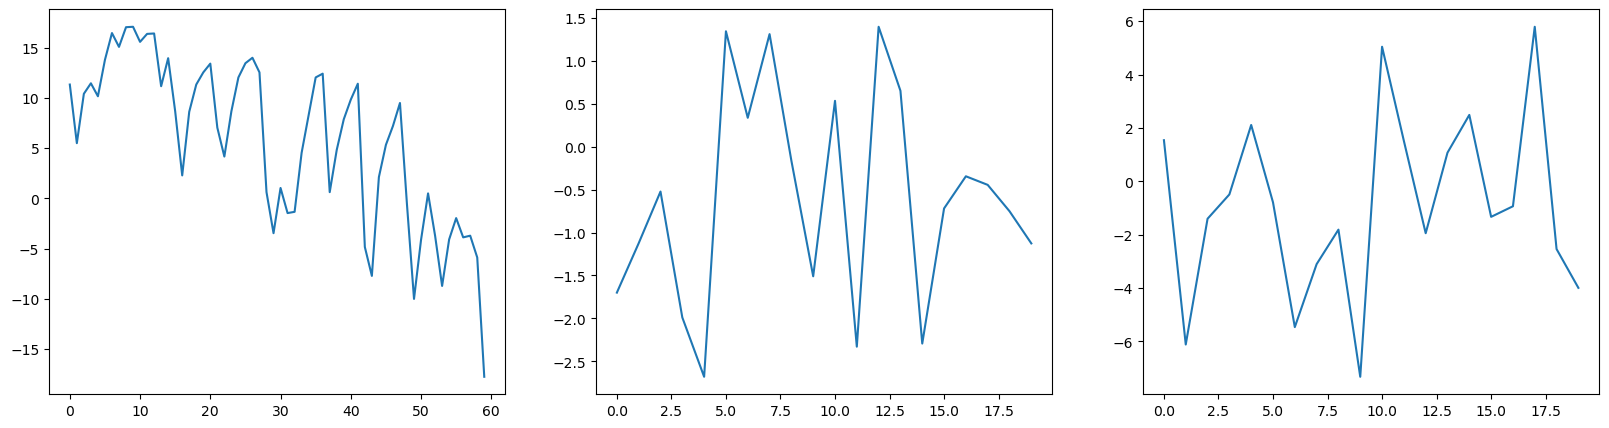

In [6]:
fig, subs = plt.subplots(1, 3, dpi=100, figsize=(20, 5))
subs[0].plot(X[0, :, 0])
subs[1].plot(X_con[0, :, 0])
subs[2].plot(X_int[0, :, 0])